## K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

### K means applies that partitioning the data into K hard clusters

### Now say we have 4 blobs of people and we want to open 4 pizza shop so how we will detect the best place to open the shop is 

### firstly we will select 4 random points then assign each customer to its nearest pizza parlour after that we will udpate the coordiantes by  taking mean of no of customers assigned to it. do above two steps until convergence

### convergene here mean that move the pizza shop till it reaches the center of the blob

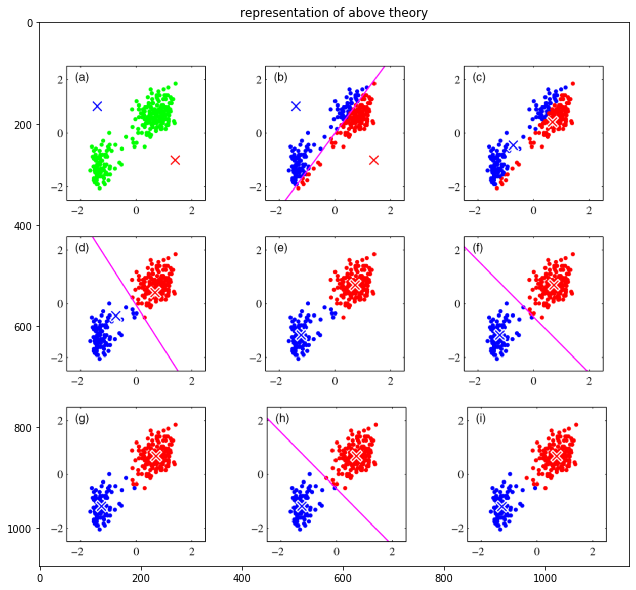

In [2]:
"""Hard clustering is about grouping the data items such that each item 
   is only assigned to one cluster. As an instance, we want the algorithm to 
   read all of the tweets and determine if a tweet is a positive or a negative tweet."""


import cv2
from matplotlib import pyplot as plt

ans=cv2.imread('k-means.png',cv2.COLOR_BGR2RGB)
new_ans=cv2.cvtColor(ans,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(new_ans)
plt.title('representation of above theory')
plt.show()

## Here in the above figure we have partition the data into 2 clusters
## In this also we first randomly initilize two random points and then do the partition which customer belongs to which cluster untill convergence

In [82]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs


# Using the blobs function present in sklearn
X,y  = make_blobs?

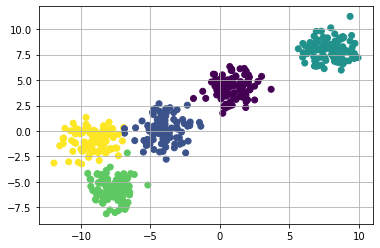

(500, 2)
(500,)
[3 2 1 3 3 1 4 3 2 3]


In [83]:
# Returns
# -------
# X : array of shape [n_samples, n_features]
#     The generated samples.

# y : array of shape [n_samples]
#     The integer labels for cluster membership of each sample.



# n_samples --->  Total number of points equally divided among clusters.
# n_features----> The number of features for each sample,by default they are 2 



X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)


# For having grid in the background
plt.grid(True)

# 0 and 1 cols are features for all 500 row
# Similarly we can have many features but it is not possible to visulaize n dimesions on a graph
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
print(X.shape)
print(y.shape)
print(y[:10])

## However makeblobs function also give the y value but we will not going to use it in our algorithm as it is a unsupervised learning algorithm (i.e labels are not present in them), may be we can use it to calculate the accuracy

In [84]:
print(X.shape[1])
print(X.shape[0])

2
500


In [85]:
np.random.random_sample((5,))

array([0.62237317, 0.70333752, 0.14114667, 0.46295472, 0.45032236])

In [86]:
# Return random floats in the half-open interval [0.0, 1.0).
np.random.random((2,3))

array([[0.42050369, 0.80832794, 0.7846663 ],
       [0.76356864, 0.98590202, 0.97138752]])

In [87]:
# To sample Uniform [a, b), b > a multiply the output of random_sample by (b-a) and add a:

for i in range(10):
    print(10*(2*np.random.random((X.shape[1],))-1))
    
    
# i.e we are getting vector of size (X.shape[1]) or of size 2 
# and the range of numbers are from -10 to 10 (see the graph why for -10 to 10 u asshole)

[0.29054183 0.93530392]
[5.60999923 4.19074972]
[ 3.74092896 -9.78411132]
[-0.65498817 -5.87255776]
[-6.98005352  1.40559965]
[-4.57017746 -4.68400716]
[4.59861122 2.30097612]
[-0.61362428  9.16918343]
[ 8.45211908 -4.63291259]
[9.16530445 2.35830543]


In [88]:
# How many clusters we want to have lets say we want to have 5 clusters
k = 5

# specifying the name for our clusters
color  = ["green","red","blue","yellow","orange"]

clusters = {}


for i in range(k):
    
    # Initializing one random center for each cluster or blob 
    # i.e we will be taking k random points for each blob
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    # For each cluster we will associate one list (i.e nearest points of that cluster)
    # center of that cluster and color associated to that cluster
    cluster = {
        'center':center,
        'points':points,
        'color': color[i]
        }
    
    clusters[i] = cluster

In [89]:
clusters

{0: {'center': array([-9.09498602,  6.83572569]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-2.65938808, -3.34766063]),
  'points': [],
  'color': 'red'},
 2: {'center': array([0.25842412, 5.39462198]), 'points': [], 'color': 'blue'},
 3: {'center': array([1.79674396, 1.65057469]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-2.84682398,  9.24763243]),
  'points': [],
  'color': 'orange'}}

In [90]:
print(X.shape[0])
print(X[0])

for ix in range(5):
    print(X[ix])

500
[-6.94238952 -6.8807223 ]
[-6.94238952 -6.8807223 ]
[8.14492336 7.52724561]
[-3.61995355 -0.07726913]
[-8.91918262 -6.772189  ]
[-7.37151112 -5.0506429 ]


In [91]:
# Using eucledian distance that we have used in knn

def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))


In [92]:
        
# Assign every data point to one of the clusters
# K means is a special case of Expectation maximization algorithm
# Where the below step in known as E-step i.e assignPointToClusters is E-step
def assignPointToClusters(clusters): 
    # Iterating over all 500 examples
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]
        
        # For each out of all 500 example find its distance from all the k (here 5) blobs
        # and storing that distance in list named dist
        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)
            
        # Finding at which index (0,1,2,3,4) in the list we are getting the minimum distance
        # and storing that index in current_cluster and then updating the clusters dictonary 
        # i.e going to the blob nearest to that point and updating the curr_x i.e coordinate of that point

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)  

        
# M-Step -> We update every cluster center according to the mean of the points in it
# i.e we do M-step till the convergence of this loop 
def updateClusters(clusters):
    # Iterating over all the centers and then extracting all the points associated to that cluster
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        
        #If a cluster has some-nonzero points then we will take the mean and update the points
        if pts.shape[0]>0: 
            # axis =0 means we will be taking mean accross the cols i.e say we have 
            # 3 points (1,2),(3,4) and (5,6) then we will be taking mean of (1,3,5) and (2,4,6)
            new_u = pts.mean(axis=0)
            
            # then we will update the center with new_u
            clusters[kx]['center'] = new_u
            
            # and after updating we will empty the list of points of that cluster
            # as we will repeat the E-step to get the list 
            # i.e if the centers have changed then next time we will have differnt number of points in that cluster
            # hence we have cleared it and again computing the number of points using e_step
            clusters[kx]['points'] = [] 

            
# Here we will be iterating over every cluster and the points associated to that cluster
def plotClusters(clusters):
    
    for kx in range(k):
        # This would be a list having the cordinates of the points nearest to it
        # print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        #print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")
        



### In the above code what are doing is taking 1 by 1 person out of all 500 people and then for that person calculating the distance from all the random centers or blobs then taking the minimum distance and after that updating the dictonary for that point

In [102]:
assignPointToClusters(clusters)

In [103]:
# Give len changes the values of len of points after each time we run assignPointToClusters
def give_len(clusters):
    for kx in range(k):
        print(len(clusters[kx]['points']))
    

give_len(clusters)

172
102
100
126
0


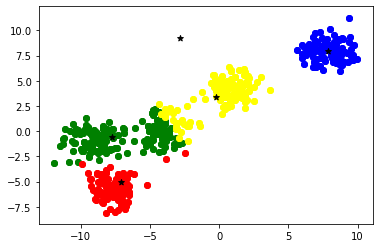

In [104]:
# Repeat this cell few times or put it inside a loop 
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

## We can see that initally red cluster is biggest and after that we keep on chaing the cluster size till convergence

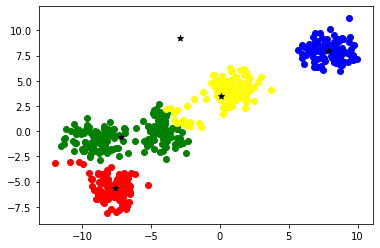

In [105]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

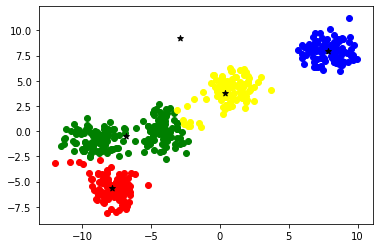

In [106]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

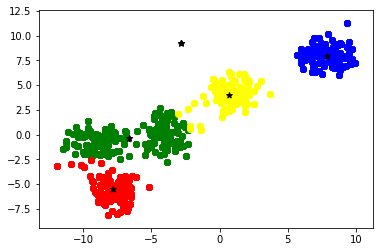

In [107]:
for i in range(5):
    assignPointToClusters(clusters)
    plotClusters(clusters)
    updateClusters(clusters)

## What we are doing here is first  going to E-step then to M-step in a loop until we get a good clustering or until the convergence


## The reason we might not be getting the correct answer is may be due to multiple local minimans in k means we reach the local minima which might not be the global minima
## i.e k means loss function is non-convex

## so we may or may not get the correct answer in k Means algorithm as it is also dependent on the initilasation

## minimization of the loss function is done by coordinate assent algorithm

## So to over come the above disadvantages we use k-means++

### K-Means++

- K-Means is quite sensitive to initalization, if the init is not good, our algorithm is not able to make desired number
of clusters.
- To overcome this problem, we use technique called K-Means++ (described in paper [Robust Seed Selection for K-Means type of Algorithms](https://arxiv.org/abs/1202.1585))
    which chooses initial centers so that they are statiscallly close to final ones.

- The method is default choice for sklearn, so we will use it directly without going into much maths!

## Refer M6B for the above


## K means might not work in all the cases  it may fail in complex datasets 
## i.e it might get fail in non linear seprable datasets

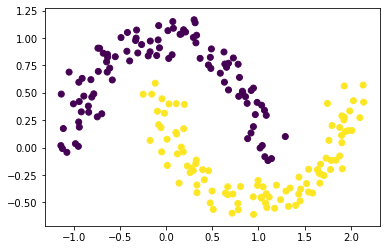

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_moons
X,Y = make_moons(n_samples=200,noise=0.10)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

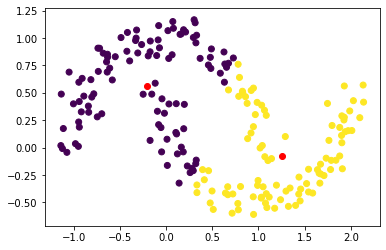

In [5]:
# Finding the cluster centers and the labels
centers = km.cluster_centers_
label = km.labels_


plt.scatter(X[:,0],X[:,1],c=label)

# We are also plotting the cluster centers
plt.scatter(centers[:,0],centers[:,1],color='red')
plt.show()

## We can see how k means is not able to reach the expected output

## Hence in these type of cases we use DBSCAN algorithm

### Density Based Spatial Clustering of Applications with Noise
### Based upon on the idea, that a cluster is a high density area surrounded by low density region
### Starts by exploring a small area, if density is "good enough" it considered as part of cluster, and explores neigbours and so on, so it groups regions based upon density!

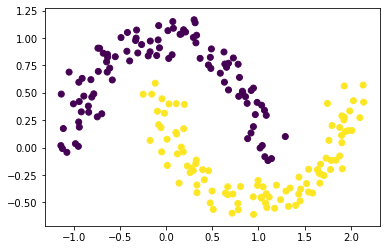

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [7]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN?

In [8]:
dbs = DBSCAN
dbs = DBSCAN(eps=0.21,min_samples=5)
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.21, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

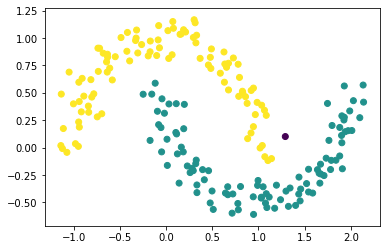

In [14]:
Ypred = dbs.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=Ypred)
plt.show()